## CTC model's fine-tuned code

Record your voice in .wav format and upload it in your notebook. Name the audio as audio.wav. Download the pretrained model in your google drive. This is required since the model is loaded from the drive. If intended to load from other source, kindly change the loading path present in the third cell.

Run the cells in linear fashion and get your letter as well as word level pronunication scores. And hence get better at talking !!!


In [ ]:
from google.colab import drive
drive.mount(('/content/drive'))

Mounted at /content/drive


In [ ]:
!pip install fairseq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 42.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia

In [ ]:
import torch

model = torch.load('/content/drive/MyDrive/SPRING_INX_wav2vec2_Marathi.pt')

# print(model)

In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os
from IPython.display import Audio

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

# def record(sec=3):
#   display(Javascript(RECORD))
#   s = output.eval_js('record(%d)' % (sec*1000))
#   b = b64decode(s.split(',')[1])
#   audio = AudioSegment.from_file(BytesIO(b))
#   return audio



# #### Please comment below line, if you already uploaded the 'recording.wav' in '/content/'
# !rm recording.wav

# #### You can run this module in the loop to record more repetitions of the digits.
# if os.path.isfile('recording.wav'):
#     print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
# else:
#     print("Recording the digits")
#     wav = record(3.0) #It will record three seconds of your speech. You can change the duration.
#     wav = wav.set_frame_rate(16000)
#     sig=wav.get_array_of_samples()
#     samples=np.array(sig).T.astype(np.float32)
#     fp_arr = np.array(samples).T.astype(np.float32)
#     fp_arr /= np.iinfo(sig.typecode).max
#     scipy.io.wavfile.write('recording.wav', 16000, fp_arr) #Please change the name.

# wn = Audio('recording.wav', autoplay=True)
# display(wn)


In [ ]:
!apt-get update
!apt-get install sox

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
sox is already the newest version (14.4.2+git20190427-2+deb11u2ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 50 not upg

In [ ]:
!apt-get install -y libsox-fmt-all libsox-dev sox > /dev/null

In [ ]:
# import sys
# import torch
# import fairseq
# import soundfile
# import torch.nn.functional as F
# import torchaudio.sox_effects as ta_sox
# from IPython.display import display, Markdown

# # Loading the audio
# model_path = '/content/drive/MyDrive/SPRING_INX_wav2vec2_Marathi.pt'
# audio_path = '/content/Recording (7).wav'
# device  = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# audio, rate = soundfile.read(audio_path, dtype="float32")
# effects = [["gain", "-n"]]
# input_sample, rate  = ta_sox.apply_effects_tensor (torch.tensor (audio).unsqueeze (0), rate, effects)
# input_sample = input_sample.float().to(device)

# # Ensure the audio tensor has the correct shape
# if len(audio.shape) == 1:
#     # Mono audio
#     audio = torch.tensor(audio).unsqueeze(0)
# else:
#     # Stereo or multi-channel audio
#     audio = torch.tensor(audio).permute(1, 0)  # [samples, channels] -> [channels, samples]

# # Apply effects
# input_sample, rate = ta_sox.apply_effects_tensor(audio, rate, effects)
# input_sample = input_sample.float().to(device)


# waveform = input_sample.squeeze().cpu().numpy()

# # with torch.inference_mode();
# #   waveform, _ = torchaudio.load(SPEECH_FILE)

# # Normalizing input
# with torch.no_grad():
#   input_sample = F.layer_norm(input_sample, input_sample.shape)

# #  Loading model
# model, cfg, task = fairseq.checkpoint_utils.load_model_ensemble_and_task([model_path])
# print(type (cfg))
# print(cfg)
# model  = model[0]
# model.to(device)
# model.eval()
# token = task.target_dictionary

# # Forward Pass
# logits = model (source=input_sample, padding_mask=None) ["encoder_out"]

# emissions = torch.log_softmax(logits, dim=-1)
# print(emissions.shape)
# emission = emissions[:, 0, :].cpu().detach()

# print(emission.shape)

# predicted_ids = torch.argmax(logits[:, 0], axis=-1)
# predicted_ids = torch.unique_consecutive (predicted_ids).tolist()
# transcription = token.string(predicted_ids)
# transcription = transcription.replace('','').replace('|',' ').strip()
# display (Markdown (f'**{transcription}**'))

import sys
import torch
import fairseq
import soundfile
import torch.nn.functional as F
import torchaudio.sox_effects as ta_sox
from IPython.display import display, Markdown

# Loading the audio
model_path = '/content/drive/MyDrive/SPRING_INX_wav2vec2_Marathi.pt'
audio_path = '/content/audio.wav'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Read audio
audio, rate = soundfile.read(audio_path, dtype="float32")

# Ensure the audio tensor has the correct shape
if len(audio.shape) == 1:
    # Mono audio
    audio_tensor = torch.tensor(audio).unsqueeze(0)
else:
    # Stereo or multi-channel audio
    audio_tensor = torch.tensor(audio).permute(1, 0)  # [samples, channels] -> [channels, samples]

# Apply effects
effects = [["gain", "-n"]]
input_sample, rate = ta_sox.apply_effects_tensor(audio_tensor, rate, effects)
input_sample = input_sample.float().to(device)

waveform = input_sample.squeeze().cpu().numpy()

# Normalizing input
with torch.no_grad():
    input_sample = F.layer_norm(input_sample, input_sample.shape)

# Loading model
model, cfg, task = fairseq.checkpoint_utils.load_model_ensemble_and_task([model_path])
print(type(cfg))
print(cfg)
model = model[0]
model.to(device)
model.eval()
token = task.target_dictionary

# Forward Pass
logits = model(source=input_sample, padding_mask=None)["encoder_out"]
emissions = torch.log_softmax(logits, dim=-1)
print(emissions.shape)
emission = emissions[:, 0, :].cpu().detach()
print(emission.shape)

predicted_ids = torch.argmax(logits[:, 0], axis=-1)
predicted_ids = torch.unique_consecutive(predicted_ids).tolist()
transcription = token.string(predicted_ids)
transcription = transcription.replace('', '').replace('|', ' ').strip()
display(Markdown(f'**{transcription}**'))


/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


<class 'omegaconf.dictconfig.DictConfig'>
{'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 200, 'log_format': 'json', 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': True, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging': False, 'suppress_crashes': False, 'use_plasma_view': False, 'plasma_path': '/tmp/plasma'}, 'common_eval': {'_name': None, '

**ष क न व ा .**

In [ ]:
print(token.string(predicted_ids))

ष क न व ा . |


In [ ]:
symbols = task.target_dictionary.symbols
print(symbols)

['<s>', '<pad>', '</s>', '<unk>', '|', 'त', 'ो', '्', 'य', 'ा', 'ं', 'च', 'श', 'ी', '1', '9', '4', '5', 'म', 'ध', 'े', 'ज', 'ड', 'ल', 'ग', 'आ', 'ण', 'ि', '8', 'प', 'र', 'ह', '.', 'अ', 'ॅ', 'स', 'ट', 'न', 'फ', 'ँ', 'क', 'ु', 'झ', ',', 'ब', 'व', 'द', 'ख', 'ष', 'थ', 'ए', 'ई', 'घ', 'ऊ', 'ू', 'ळ', 'उ', 'इ', 'ः', 'ठ', 'h', 'n', 'ृ', 'छ', 'भ', 'ै', 'ढ', 'ॉ', '४', '६', '२', '१', '७', '५', '९', '०', '?', 'ञ', 'w', 'i', 'f', 'p', 'c', 'ओ', '८', '2', '0', '7', '३', 'ौ', 'g', 's', 'ऐ', 'a', 'l', 'm', 'z', '3', 'औ', 'ऑ', 'o', 't', 'b', '6', 'x', 'e', 'y', 'u', 'q', 'v', 'r', 'k', 'd', '-', '°', 'ऋ', 'j', '²', 'ऍ', '!', ':', 'ङ', 'ॐ', '।', 'X', 'T', 'V', 'Y', 'O', 'S', 'H', 'A', 'P', 'M', 'C', 'F', 'I', 'B', 'E', 'D', 'J', 'W', 'L', 'K', 'R', 'G', 'N', 'Z', 'U', 'Q']


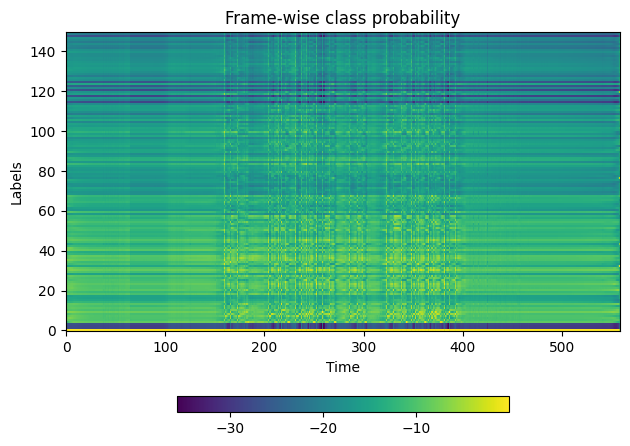

In [ ]:
import matplotlib.pyplot as plt

def plot(emission):
    fig, ax = plt.subplots()
    emission_cpu = emission.cpu().detach()  # Detach the tensor from its computation graph

    # Plot the emission matrix directly
    img = ax.imshow(emission_cpu.T, aspect='auto', origin='lower', interpolation='none')

    ax.set_title("Frame-wise class probability")
    ax.set_xlabel("Time")
    ax.set_ylabel("Labels")
    fig.colorbar(img, ax=ax, shrink=0.6, location="bottom")
    fig.tight_layout()
    plt.show()

# Assuming `emission` is already defined and has shape [seq_length, num_classes]
plot(emission)


In [ ]:
import torch
# We enclose the transcript with space tokens, which represent SOS and EOS.
transcript = "|कठोरपणे|कृत्य|करणे|"
labels = list(set(transcript))  # Get unique characters from the transcript
labels.sort()  # Optional: sort the labels

dictionary = {c: i for i, c in enumerate(labels)}

tokens = [dictionary[c] for c in transcript]
print(list(zip(transcript, tokens)))



def get_trellis(emission, tokens, blank_id=0):
    num_frame = emission.size(0)
    num_tokens = len(tokens)

    trellis = torch.zeros((num_frame, num_tokens))

    # Ensure blank_id is a scalar
    if torch.is_tensor(blank_id):
        blank_id = blank_id.item()

    cumsum = torch.cumsum(emission[1:,blank_id],dim=0)
    trellis[1:,0] = cumsum
    # trellis[1:, 0] = torch.cumsum(emission[1:, blank_id], 0).unsqueeze(1)
    # print(torch.cumsum(emission[1:, blank_id], 0).shape)
    trellis[0, 1:] = -float("inf")
    trellis[-num_tokens + 1 :, 0] = float("inf")
    for t in range(num_frame - 1):
        trellis[t + 1, 1:] = torch.maximum(
            # Score for staying at the same token
            trellis[t, 1:] + emission[t, blank_id],
            # Score for changing to the next token
            trellis[t, :-1] + emission[t, tokens[1:]],
        )
    return trellis


trellis = get_trellis(emission, tokens)

print(trellis)


[('|', 0), ('क', 1), ('ठ', 2), ('ो', 10), ('र', 7), ('प', 5), ('ण', 3), ('े', 9), ('|', 0), ('क', 1), ('ृ', 8), ('त', 4), ('्', 11), ('य', 6), ('|', 0), ('क', 1), ('र', 7), ('ण', 3), ('े', 9), ('|', 0)]
tensor([[ 0.0000e+00,        -inf,        -inf,  ...,        -inf,
                -inf,        -inf],
        [-7.6731e-03, -2.9605e+01,        -inf,  ...,        -inf,
                -inf,        -inf],
        [-1.5668e-02, -2.7309e+01, -5.6943e+01,  ...,        -inf,
                -inf,        -inf],
        ...,
        [        inf,         inf,         inf,  ..., -1.7938e+02,
         -1.7938e+02, -1.7938e+02],
        [        inf,         inf,         inf,  ...,         inf,
         -1.7938e+02, -1.7938e+02],
        [        inf,         inf,         inf,  ...,         inf,
                 inf, -1.8290e+02]])


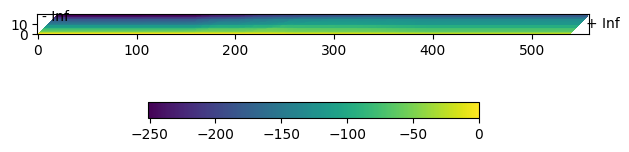

In [ ]:
def plot():
    fig, ax = plt.subplots()
    img = ax.imshow(trellis.T, origin="lower")
    ax.annotate("- Inf", (trellis.size(1) / 5, trellis.size(1) / 1.5))
    ax.annotate("+ Inf", (trellis.size(0) - trellis.size(1) / 5, trellis.size(1) / 3))
    fig.colorbar(img, ax=ax, shrink=0.6, location="bottom")
    fig.tight_layout()


plot()

In [ ]:
from dataclasses import dataclass

@dataclass
class Point:
    token_index: int
    time_index: int
    score: float


def backtrack(trellis, emission, tokens, blank_id=0):
    t, j = trellis.size(0) - 1, trellis.size(1) - 1

    path = [Point(j, t, emission[t, blank_id].exp().item())]
    while j > 0:
        # Should not happen but just in case
        assert t > 0

        # 1. Figure out if the current position was stay or change
        # Frame-wise score of stay vs change
        p_stay = emission[t - 1, blank_id]
        p_change = emission[t - 1, tokens[j]]

        # Context-aware score for stay vs change
        stayed = trellis[t - 1, j] + p_stay
        changed = trellis[t - 1, j - 1] + p_change

        # Update position
        t -= 1
        if changed > stayed:
            j -= 1

        # Store the path with frame-wise probability.
        prob = (p_change if changed > stayed else p_stay).exp().item()
        path.append(Point(j, t, prob))

    # Now j == 0, which means, it reached the SoS.
    # Fill up the rest for the sake of visualization
    while t > 0:
        prob = emission[t - 1, blank_id].exp().item()
        path.append(Point(j, t - 1, prob))
        t -= 1

    return path[::-1]


path = backtrack(trellis, emission, tokens)
for p in path:
    print(p)

Point(token_index=0, time_index=0, score=0.9422078132629395)
Point(token_index=0, time_index=1, score=0.9923563003540039)
Point(token_index=0, time_index=2, score=0.9920369386672974)
Point(token_index=0, time_index=3, score=0.9915237426757812)
Point(token_index=0, time_index=4, score=0.9912859797477722)
Point(token_index=0, time_index=5, score=0.9913113117218018)
Point(token_index=0, time_index=6, score=0.9914520978927612)
Point(token_index=0, time_index=7, score=0.9929404258728027)
Point(token_index=0, time_index=8, score=0.9936005473136902)
Point(token_index=0, time_index=9, score=0.9941884279251099)
Point(token_index=0, time_index=10, score=0.9946848154067993)
Point(token_index=0, time_index=11, score=0.9951744675636292)
Point(token_index=0, time_index=12, score=0.9955062866210938)
Point(token_index=0, time_index=13, score=0.9957767724990845)
Point(token_index=0, time_index=14, score=0.9960545301437378)
Point(token_index=0, time_index=15, score=0.9962896108627319)
Point(token_index=

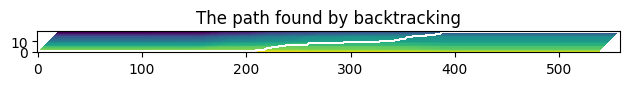

In [ ]:
def plot_trellis_with_path(trellis, path):
    # To plot trellis with path, we take advantage of 'nan' value
    trellis_with_path = trellis.clone()
    for _, p in enumerate(path):
        trellis_with_path[p.time_index, p.token_index] = float("nan")
    plt.imshow(trellis_with_path.T, origin="lower")
    plt.title("The path found by backtracking")
    plt.tight_layout()


plot_trellis_with_path(trellis, path)

In [ ]:
# Merge the labels
@dataclass
class Segment:
    label: str
    start: int
    end: int
    score: float

    def __repr__(self):
        return f"{self.label}\t({self.score:4.2f}): [{self.start:5d}, {self.end:5d})"

    @property
    def length(self):
        return self.end - self.start


def merge_repeats(path):
    i1, i2 = 0, 0
    segments = []
    while i1 < len(path):
        while i2 < len(path) and path[i1].token_index == path[i2].token_index:
            i2 += 1
        score = sum(path[k].score for k in range(i1, i2)) / (i2 - i1)
        segments.append(
            Segment(
                transcript[path[i1].token_index],
                path[i1].time_index,
                path[i2 - 1].time_index + 1,
                score,
            )
        )
        i1 = i2
    return segments


segments = merge_repeats(path)
for seg in segments:
    print(seg)

|	(0.98): [    0,   210)
क	(0.79): [  210,   218)
ठ	(0.50): [  218,   220)
ो	(0.76): [  220,   225)
र	(0.84): [  225,   232)
प	(0.81): [  232,   238)
ण	(0.88): [  238,   259)
े	(0.99): [  259,   260)
|	(0.94): [  260,   294)
क	(0.94): [  294,   328)
ृ	(0.89): [  328,   343)
त	(0.80): [  343,   348)
्	(0.76): [  348,   353)
य	(0.98): [  353,   354)
|	(0.74): [  354,   360)
क	(0.81): [  360,   373)
र	(0.82): [  373,   382)
ण	(0.91): [  382,   387)
े	(0.99): [  387,   388)
|	(0.98): [  388,   559)


<ipython-input-47-bec29a247475>:38: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.tight_layout()
<ipython-input-47-bec29a247475>:38: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.tight_layout()
<ipython-input-47-bec29a247475>:38: UserWarning: Glyph 2336 (\N{DEVANAGARI LETTER TTHA}) missing from current font.
  fig.tight_layout()
<ipython-input-47-bec29a247475>:38: UserWarning: Glyph 2379 (\N{DEVANAGARI VOWEL SIGN O}) missing from current font.
  fig.tight_layout()
<ipython-input-47-bec29a247475>:38: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  fig.tight_layout()
<ipython-input-47-bec29a247475>:38: UserWarning: Glyph 2346 (\N{DEVANAGARI LETTER PA}) missing from current font.
  fig.tight_layout()
<ipython-input-47-bec29a247475>:38: UserWarning: Glyph 2339 (\N{DEVANAGARI LETTER NNA}) missing from current font.
  fig.tight_layout()
<ipython-input-47-bec29a247475>:38: UserWarning: Glyph 

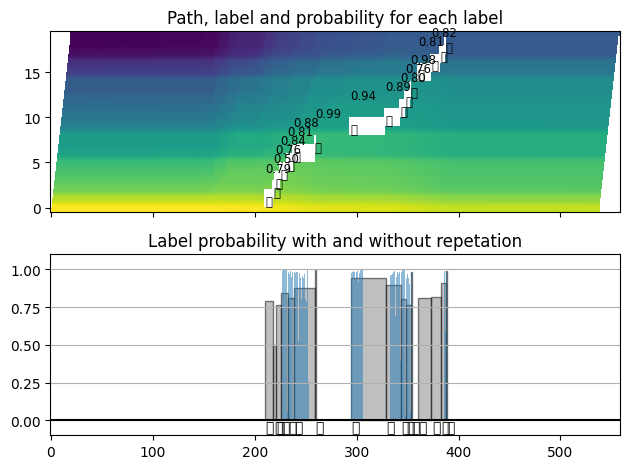

In [ ]:
def plot_trellis_with_segments(trellis, segments, transcript):
    # To plot trellis with path, we take advantage of 'nan' value
    trellis_with_path = trellis.clone()
    for i, seg in enumerate(segments):
        if seg.label != "|":
            trellis_with_path[seg.start : seg.end, i] = float("nan")

    fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)
    ax1.set_title("Path, label and probability for each label")
    ax1.imshow(trellis_with_path.T, origin="lower", aspect="auto")

    for i, seg in enumerate(segments):
        if seg.label != "|":
            ax1.annotate(seg.label, (seg.start, i - 0.7), size="small")
            ax1.annotate(f"{seg.score:.2f}", (seg.start, i + 3), size="small")

    ax2.set_title("Label probability with and without repetation")
    xs, hs, ws = [], [], []
    for seg in segments:
        if seg.label != "|":
            xs.append((seg.end + seg.start) / 2 + 0.4)
            hs.append(seg.score)
            ws.append(seg.end - seg.start)
            ax2.annotate(seg.label, (seg.start + 0.8, -0.07))
    ax2.bar(xs, hs, width=ws, color="gray", alpha=0.5, edgecolor="black")

    xs, hs = [], []
    for p in path:
        label = transcript[p.token_index]
        if label != "|":
            xs.append(p.time_index + 1)
            hs.append(p.score)

    ax2.bar(xs, hs, width=0.5, alpha=0.5)
    ax2.axhline(0, color="black")
    ax2.grid(True, axis="y")
    ax2.set_ylim(-0.1, 1.1)
    fig.tight_layout()


plot_trellis_with_segments(trellis, segments, transcript)

In [ ]:
# Merge words
def merge_words(segments, separator="|"):
    words = []
    i1, i2 = 0, 0
    while i1 < len(segments):
        if i2 >= len(segments) or segments[i2].label == separator:
            if i1 != i2:
                segs = segments[i1:i2]
                word = "".join([seg.label for seg in segs])
                score = sum(seg.score * seg.length for seg in segs) / sum(seg.length for seg in segs)
                words.append(Segment(word, segments[i1].start, segments[i2 - 1].end, score))
            i1 = i2 + 1
            i2 = i1
        else:
            i2 += 1
    return words


word_segments = merge_words(segments)
for word in word_segments:
    print(word)



कठोरपणे	(0.83): [  210,   260)
कृत्य	(0.91): [  294,   354)
करणे	(0.84): [  360,   388)


In [ ]:
# Merge words
def merge_words(segments, separator="|"):
    words = []
    i1, i2 = 0, 0
    while i1 < len(segments):
        if i2 >= len(segments) or segments[i2].label == separator:
            if i1 != i2:
                segs = segments[i1:i2]
                word = "".join([seg.label for seg in segs])
                score = sum(seg.score * seg.length for seg in segs) / sum(seg.length for seg in segs)
                words.append(Segment(word, segments[i1].start, segments[i2 - 1].end, score))
            i1 = i2 + 1
            i2 = i1
        else:
            i2 += 1
    return words


word_segments = merge_words(segments)
for word in word_segments:
    print(word)

Segment(label='कठोरपणे', start=210, end=260, score=0.826314040457096)
Segment(label='कृत्य', start=294, end=354, score=0.9059787458740175)
Segment(label='करणे', start=360, end=388, score=0.8381605630612484)


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
<ipython-input-58-f5e5b7291f2b>:41: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.tight_layout()
<ipython-input-58-f5e5b7291f2b>:41: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.tight_layout()
<ipython-input-58-f5e5b7291f2b>:41: UserWarning: Glyph 2336 (\N{DEVANAGARI LETTER TTHA}) missing from current font.
  fig.tight_layout()
<ipython-input-58-f5e5b7291f2b>:41: UserWarning: Glyph 2379 (\N{DEVANAGARI VOWEL SIGN O}) missing from current font.
  fig.tight_layout()
<ipython-input-58-f5e5b7291f2b>:41: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  fig.tight_layout()
<ipython-input-58-f5e5b7291f2b>:41: UserWarning: Glyph 2346 (\N{DEVANAGARI LETTER PA}) missing from current font.
  fig.tight_layout()
<ipython-input-58-f5e5b7291f2b>:41: UserW

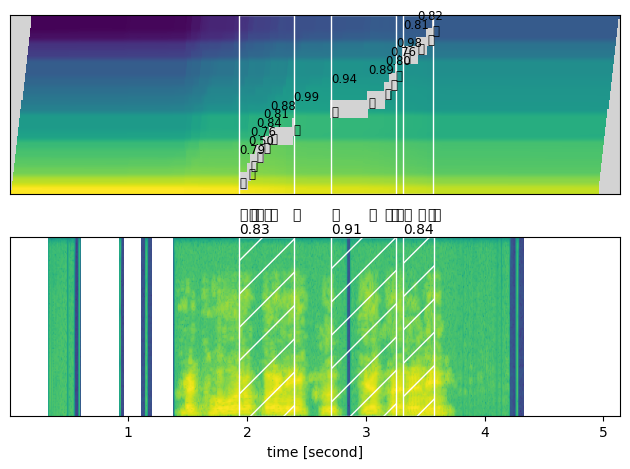

In [ ]:
import librosa

# Load the audio file
waveform, sample_rate = librosa.load(audio_path)

def plot_alignments(trellis, segments, word_segments, waveform, sample_rate=16000):
    trellis_with_path = trellis.clone()
    for i, seg in enumerate(segments):
        if seg.label != "|":
            trellis_with_path[seg.start : seg.end, i] = float("nan")

    fig, [ax1, ax2] = plt.subplots(2, 1)

    ax1.imshow(trellis_with_path.T, origin="lower", aspect="auto")
    ax1.set_facecolor("lightgray")
    ax1.set_xticks([])
    ax1.set_yticks([])

    for word in word_segments:
        ax1.axvspan(word.start - 0.5, word.end - 0.5, edgecolor="white", facecolor="none")

    for i, seg in enumerate(segments):
        if seg.label != "|":
            ax1.annotate(seg.label, (seg.start, i - 0.7), size="small")
            ax1.annotate(f"{seg.score:.2f}", (seg.start, i + 3), size="small")

    # The original waveform
    ratio = len(waveform) / sample_rate / trellis.size(0)
    ax2.specgram(waveform, Fs=sample_rate)
    for word in word_segments:
        x0 = ratio * word.start
        x1 = ratio * word.end
        ax2.axvspan(x0, x1, facecolor="none", edgecolor="white", hatch="/")
        ax2.annotate(f"{word.score:.2f}", (x0, sample_rate * 0.51), annotation_clip=False)

    for seg in segments:
        if seg.label != "|":
            ax2.annotate(seg.label, (seg.start * ratio, sample_rate * 0.55), annotation_clip=False)
    ax2.set_xlabel("time [second]")
    ax2.set_yticks([])
    fig.tight_layout()


plot_alignments(trellis, segments, word_segments, waveform)

In [ ]:
def display_segment(i):
    ratio = waveform.shape[0] / trellis.size(0)
    word = word_segments[i]
    x0 = int(ratio * word.start)
    x1 = int(ratio * word.end)
    print(f"{word.label} ({word.score:.2f}): {x0 / bundle.sample_rate:.3f} - {x1 / bundle.sample_rate:.3f} sec")
    segment = waveform[x0:x1]
    return IPython.display.Audio(segment, rate=bundle.sample_rate)

print(bundle.sample_rate)

16000


In [ ]:
import IPython
# Generate the audio for each segment
print(transcript)
IPython.display.Audio(audio_path)

|कठोरपणे|कृत्य|करणे|


In [ ]:
display_segment(0)

कठोरपणे (0.83): 1.933 - 2.393 sec


In [ ]:
display_segment(1)

कृत्य (0.91): 2.706 - 3.258 sec


In [ ]:
display_segment(2)

करणे (0.84): 3.313 - 3.571 sec
